# FINAL PROJECT 1 REGRESSION LINIER

# Perkenalan

Nama : Wilda Amrul Munafiah

Program : Python for Data Science

Kode Peserta : PYTN-KS16-021

# Data 
Dataset yang digunakan pada analisis ini yaitu Uber vs Lyft Dataset yang diunduh dari kaggle melalui link berikut https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

Dataset ini berisikan data pemesanan taksi online yang dilengkapi dengan 57 atribut dengan 693071 rows. Atribut yang menjadi target yaitu atribut Price/Tarif, sedangkan atribut lainnya merupakan prediktor.

# Objective
Objective yang ingin dicapat pada analisis ini, yaitu:

1. Mampu memahami konsep regression dengan Linear Regression
2. Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
3. Mampu mengimplementasikan Linear Regression untuk membuat prediksi

# B. Import Library

Cell pertama pada notebook harus berisi dan hanya berisi semua library
yang digunakan dalam project.

In [1]:
# Import Library
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import pickle

# C. Data Loading

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan
explorasi data secara sederhana.

In [2]:
df=pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


In [6]:
df.describe(include ='O')

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


In [7]:
# Melihat unique value pada masing-masing atribut
for col in df.columns:
    print(col,':', df[col].nunique())

id : 693071
timestamp : 36179
hour : 24
day : 17
month : 2
datetime : 31350
timezone : 1
source : 12
destination : 12
cab_type : 2
product_id : 13
name : 13
price : 147
distance : 549
surge_multiplier : 7
latitude : 11
longitude : 12
temperature : 308
apparentTemperature : 319
short_summary : 9
long_summary : 11
precipIntensity : 63
precipProbability : 29
humidity : 51
windSpeed : 291
windGust : 286
windGustTime : 25
visibility : 227
temperatureHigh : 129
temperatureHighTime : 23
temperatureLow : 133
temperatureLowTime : 31
apparentTemperatureHigh : 124
apparentTemperatureHighTime : 27
apparentTemperatureLow : 136
apparentTemperatureLowTime : 32
icon : 7
dewPoint : 313
pressure : 316
windBearing : 195
cloudCover : 83
uvIndex : 3
visibility.1 : 227
ozone : 274
sunriseTime : 110
sunsetTime : 114
moonPhase : 18
precipIntensityMax : 65
uvIndexTime : 20
temperatureMin : 131
temperatureMinTime : 25
temperatureMax : 128
temperatureMaxTime : 23
apparentTemperatureMin : 137
apparentTemperatureM

In [8]:
df.shape

(693071, 57)

# D. Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [9]:
# Melihat duplikasi data
df.duplicated().sum()

0

In [10]:
# Melihat Missing value pada dataset
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [11]:
# Menghilangkan missing valuepada kolom price
med = df['price'].median()
df['price'].fillna(med, inplace=True)

df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [12]:
# Menghilangkan kolom yang tidak diperlukan
drop_cols = ["id", "timestamp", "timezone", "product_id", "latitude", "longitude", "precipIntensity", "precipProbability", 
             "windGustTime", "temperatureHigh", "temperatureHighTime", "temperatureLow", "temperatureLowTime", 
             "apparentTemperatureHigh", "apparentTemperatureHighTime", "apparentTemperatureLow", "apparentTemperatureLowTime", 
             "icon", "dewPoint", "windBearing", "uvIndex", "visibility.1", "ozone", "sunriseTime", "sunsetTime", "uvIndexTime",
             "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime", "apparentTemperatureMin", 
             "apparentTemperatureMinTime", "apparentTemperatureMax", "apparentTemperatureMaxTime", "apparentTemperature",
             "short_summary", "long_summary", "humidity", "windSpeed", "windGust", "visibility", "pressure",
             "cloudCover", "moonPhase", "precipIntensityMax"]

In [13]:
df=df.drop(drop_cols, axis=1)
df.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44


In [14]:
# Membuat kolom baru
df['price_Per_mill'] = df['price'] / df['distance']

# E. Data Eksplorasi

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.


#### Analisis Tren Waktu

In [15]:
# Tanggal Uber
df.loc[df['cab_type'] == 'Uber', 'datetime'].agg(('min', 'max'))

min    2018-11-26 03:40:46
max    2018-12-18 19:15:10
Name: datetime, dtype: object

In [16]:
# Tanggal Lyft
df.loc[df['cab_type'] == 'Lyft', 'datetime'].agg(('min', 'max'))

min    2018-11-26 03:40:46
max    2018-12-18 19:15:10
Name: datetime, dtype: object

Data yang dimiliki hanya memuat bulan November dan Desember. Artinya data hanya direkam atau diambil pada bulan november dan desember dengan dominasi data pada bulan desember.

#### Analisis Tren Jarak

In [17]:
# Mencari jarak terdekat dan terjauh pada Uber dan Lyft selama menerima penumpang.
# Jarak Uber
df.loc[df['cab_type'] == 'Uber', 'distance'].agg(('min', 'max'))

min    0.02
max    7.86
Name: distance, dtype: float64

In [18]:
# Jarak Lyft
df.loc[df['cab_type'] == 'Lyft', 'distance'].agg(('min', 'max'))

min    0.39
max    6.33
Name: distance, dtype: float64

#### Analisis Tren Harga

In [19]:
# Mencari harga termurah dan termahal pada Uber dan Lyft selama menerima penumpang.
# Harga Uber
print('Harga uber:',df.loc[ df['cab_type'] == 'Uber', 'price'].agg(('min', 'max')))

Harga uber: min     4.5
max    89.5
Name: price, dtype: float64


In [20]:
# Harga Uber
print('Harga Lyft:',df.loc[ df['cab_type'] == 'Lyft', 'price'].agg(('min', 'max')))

Harga Lyft: min     2.5
max    97.5
Name: price, dtype: float64


In [21]:
pd.crosstab(df.cab_type, df.name)

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,Taxi,UberPool,UberX,UberXL,WAV
cab_type,,,,,,,,,,,,,
Lyft,0,0,51235,51235,51235,51235,51235,51233,0,0,0,0,0
Uber,55095,55096,0,0,0,0,0,0,55095,55091,55094,55096,55096


In [22]:
mean_ = df[['name','price']].groupby('name').mean().sort_values(by='price', ascending=False)
mean_

,price
name,
Lux Black XL,32.324086
Black SUV,30.286763
Lux Black,23.062468
Black,20.523786
Lux,17.771240
UberXL,15.678144
Lyft XL,15.309363
Taxi,13.500000
UberX,9.765074


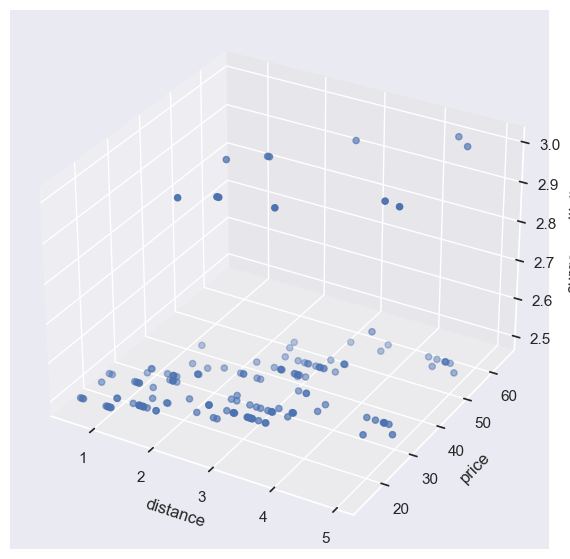

In [23]:
surge_data = df[df["surge_multiplier"]>2.0]
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(111, projection = '3d')

x = surge_data['distance']
y = surge_data['price']
z = surge_data['surge_multiplier']

ax.set_xlabel("distance")
ax.set_ylabel("price")
ax.set_zlabel("surge_multiplier")

ax.scatter(x, y, z)

plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_18464\2991098395.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2%',annot_kws={"size": 10},cmap="Greens")


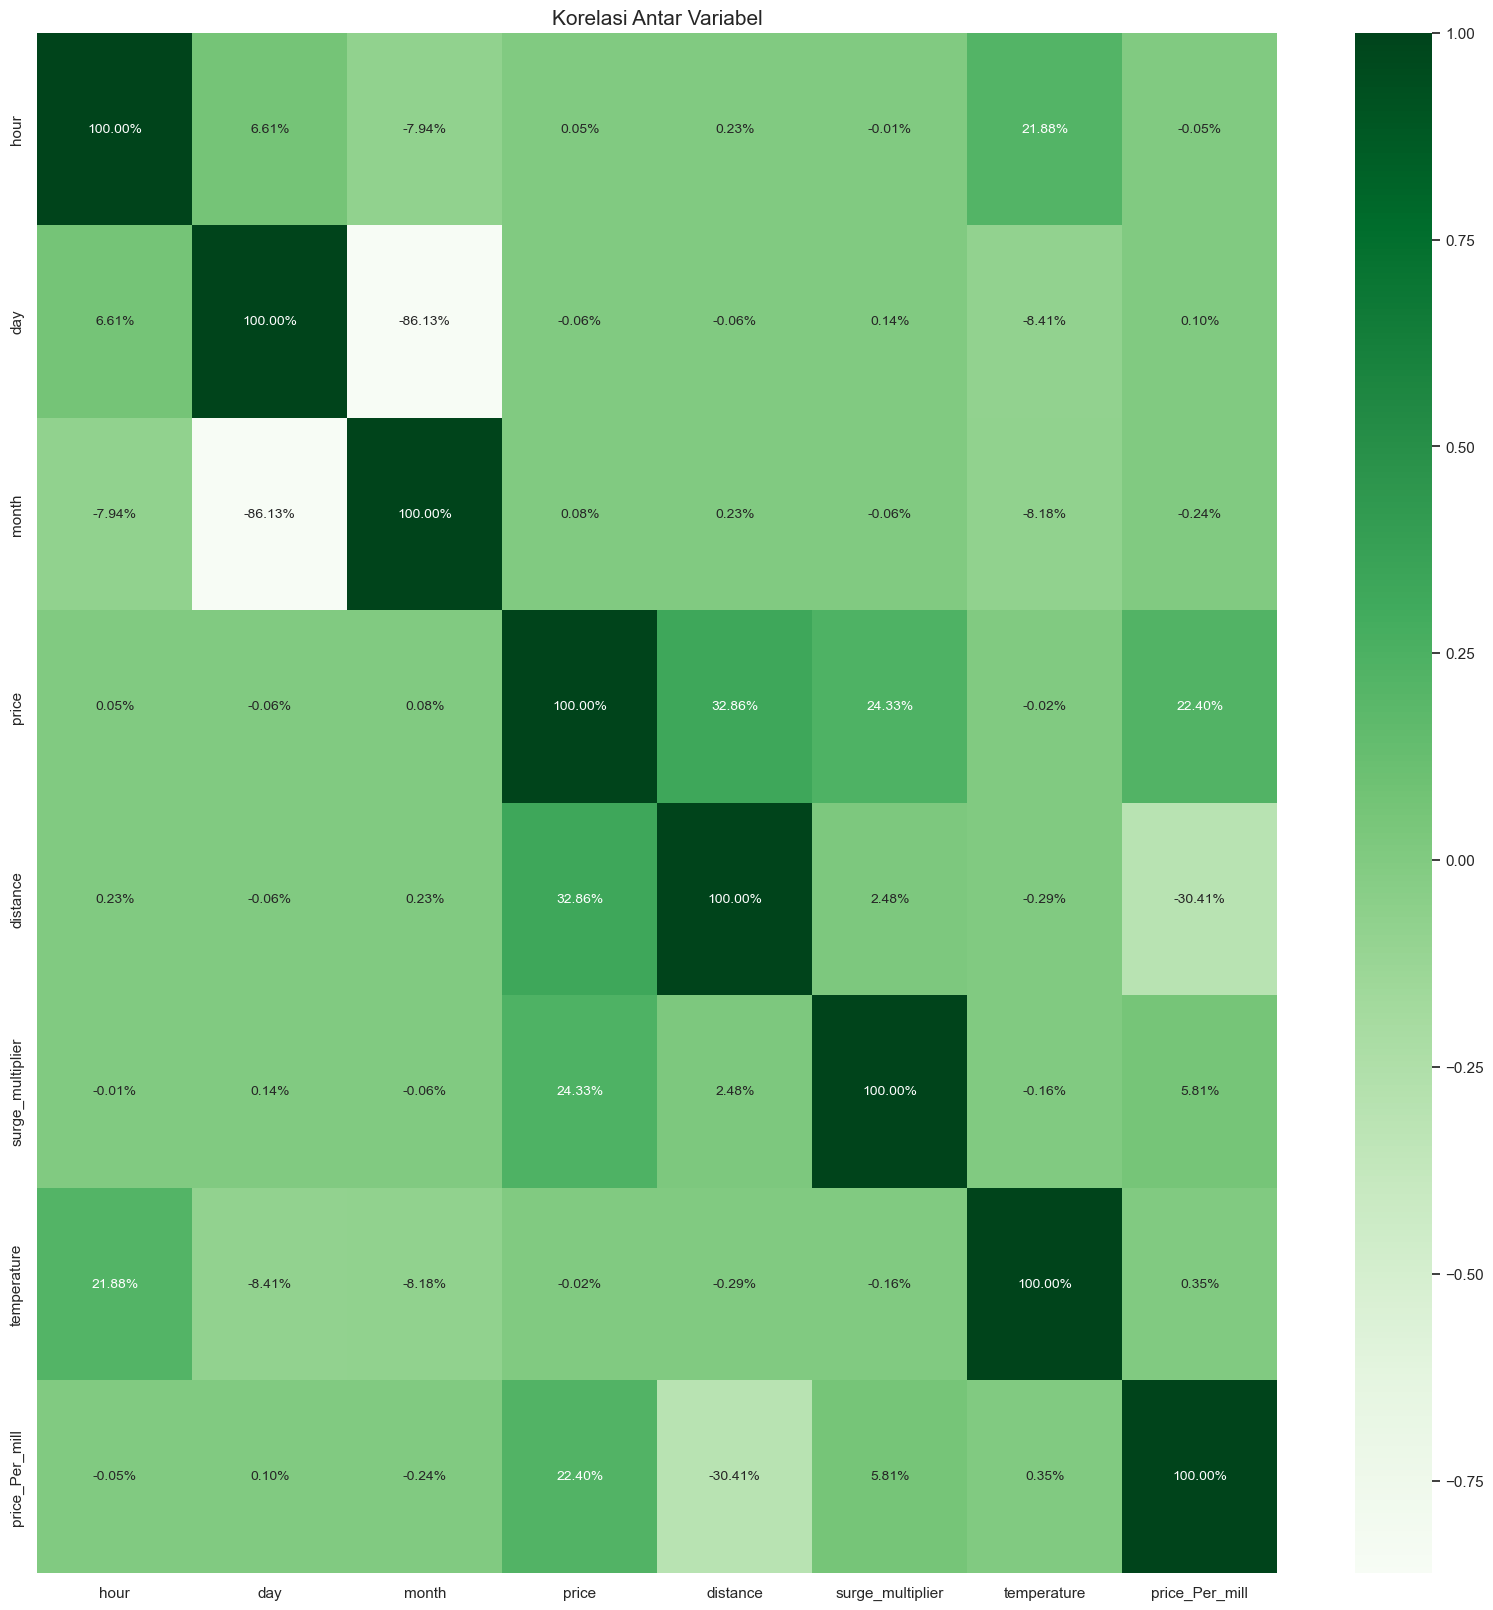

In [24]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2%',annot_kws={"size": 10},cmap="Greens")
plt.title("Korelasi Antar Variabel", loc='center',size ='15')
plt.show()

# F. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan

In [25]:
#  Melakukan inisialisasi variabel x dan y
X = df.drop(['price', 'price_Per_mill', 'datetime'], axis=1)
y = df['price']

print(X.shape)
print(y.shape)

(693071, 10)
(693071,)


In [26]:
# Memanggil kolom 'price'
price = df['price']

# Menghitung nilai rata-rata pada kolom 'price'
print("Mean : ", price.mean())

# Menghitung nilai median pada kolom 'price'
print("Median : ", price.median())

# Menghitung nilai Modus pada kolom ' ' 
print("Mode : ", price.mode())

# Generate and display a summary of basic statistics for the 'price' column
price.describe()

Mean :  16.303056223676936
Median :  13.5
Mode :  0    13.5
Name: price, dtype: float64


count    693071.000000
mean         16.303056
std           8.983913
min           2.500000
25%           9.500000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [27]:
# melakukan encoding pada float dan categorical columns dg label encoder
encode = LabelEncoder()

df['datetime'] = encode.fit_transform(df['datetime'])
df['source'] = encode.fit_transform(df['source'])
df['destination'] = encode.fit_transform(df['destination'])
df['cab_type'] = encode.fit_transform(df['cab_type'])
df['name'] = encode.fit_transform(df['name'])
df['surge_multiplier'] = encode.fit_transform(df['surge_multiplier'])
df['distance'] = encode.fit_transform(df['distance'])

df.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,price_Per_mill
0,9,16,12,25351,5,7,0,7,5.0,15,0,42.34,11.363636
1,2,27,11,961,5,7,0,2,11.0,15,0,43.58,25.000000
2,1,28,11,2534,5,7,0,5,7.0,15,0,38.33,15.909091
3,4,30,11,6988,5,7,0,4,26.0,15,0,34.38,59.090909
4,3,29,11,4400,5,7,0,6,9.0,15,0,37.44,20.454545


In [28]:
#Melakukan inisialisasi ulang variabel X dan y setelah dilakukan encoding
X_transform = df.drop(['price', 'price_Per_mill', 'datetime'], axis=1)
y = df['price']

print(X.shape)
print(y.shape)

(693071, 10)
(693071,)


In [29]:
ir = LinearRegression()
sfs=SFS(ir,
        k_features=6,
        forward=True,
        floating=False,
        scoring = 'r2',
        cv = 3)

In [30]:
sfs.fit(X_transform,y)
sfs.k_feature_names_

('source', 'destination', 'cab_type', 'name', 'distance', 'surge_multiplier')

In [31]:
# Feature Selection menggunakan library F regression dengan k=6
topFeatures = SelectKBest(f_regression, k=6)
fit = topFeatures.fit(X_transform, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_transform.columns)
 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Features', 'Score']

print("Top 5 Features yang Berpengaruh")
print(featureScores.nlargest(6, 'Score'))

Top 5 Features yang Berpengaruh
           Features          Score
6              name  358425.591811
7          distance   84977.278050
8  surge_multiplier   44162.616118
5          cab_type    7604.960908
4       destination    1361.091110
3            source     408.027999


In [32]:
#Memasukkan hasil dari feature seletion ke dalam variabel X_fit untuk selanjutnya dilakukan pemodelan
X_fit=df[['source', 'destination', 'cab_type', 'name', 'distance', 'surge_multiplier']]

In [33]:
X_fit.head()

,source,destination,cab_type,name,distance,surge_multiplier
0,5,7,0,7,15,0
1,5,7,0,2,15,0
2,5,7,0,5,15,0
3,5,7,0,4,15,0
4,5,7,0,6,15,0


In [34]:
X_fit.info()
X_fit.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   source            693071 non-null  int32
 1   destination       693071 non-null  int32
 2   cab_type          693071 non-null  int32
 3   name              693071 non-null  int32
 4   distance          693071 non-null  int64
 5   surge_multiplier  693071 non-null  int64
dtypes: int32(4), int64(2)
memory usage: 21.2 MB


(693071, 6)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.20, random_state=13)


In [36]:
print(X_train.shape)
print(X_test.shape)

(554456, 6)
(138615, 6)


In [37]:
# Group the DataFrame 'df' by the 'destination' column and calculate the sum of prices for each group
destination_prices = df.groupby('destination')['price'].sum()
destination_prices.head()

destination
0     924183.00
1     920162.50
2    1069177.85
3    1026751.00
4    1040860.50
Name: price, dtype: float64

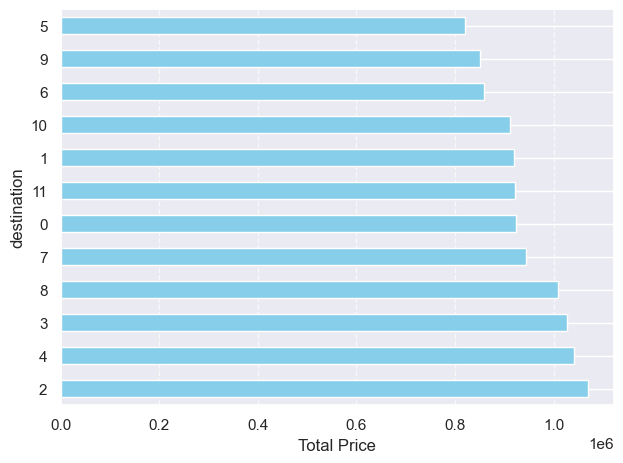

In [38]:
# Sort the 'destination_prices' data in descending order, based on the total prices
destination_prices = destination_prices.sort_values(ascending=False)

# Create a new figure for plotting
plt.figure()

# Plot the destination prices as a horizontal bar chart
destination_prices.plot(kind='barh', color='skyblue')

# Add grid lines for the x-axis with a dashed line style and transparency
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Label for the y-axis (vertical axis)
plt.xlabel('Total Price')

# Ensure the plot layout is tight
plt.tight_layout()

# Display the plot
plt.show()


# G. Pendefinisian Model

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.
Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter,
dan hal lain yang berkaitan.


Model yang digunakan pada pemodelan ini adalah :
    
    1. Dependent variable : Price
    2. Independent variables: Source, Destination, Cab Type, Name, Distance, dan Surge Multiplier

In [39]:
linreg1 = LinearRegression(fit_intercept = False)

In [40]:
linreg2 = make_pipeline(StandardScaler(with_mean=True), LinearRegression())

# H. Pelatihan Model

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.


In [41]:
model1 = linreg1.fit(X_train, y_train)

In [42]:
model2 = linreg2.fit(X_train, y_train)

# I. Evaluasi Model

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus
dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model. Jika memilih untuk melakukan model deployment, lanjut ke poin
dibawah. Jika tidak, lanjut ke poin 5 dan 6.


In [43]:
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)

### Evaluasi pada MODEL 1

In [44]:
# memprediksi nilai R-squared (R2) untuk evaluasi model terbaik
print('R2 train:', model1.score(X_train, y_train))
print('R2 test:', model1.score(X_test, y_test))

# Menghitung nilai MSE (mean squared error) 
MSE = mean_squared_error(y_test, y_pred1)
print('MSE:', MSE)

# Menghitung nilai RMSE (root mean squared error)
print('RMSE:',np.sqrt(MSE) )

R2 train: 0.21140470159259717
R2 test: 0.2107534822677467
MSE: 63.35294715896889
RMSE: 7.959456461277296


Dengan menggunakan model 1 score R2 baik menggunakan data training maupun data testing score yang didapat relatif kecil yaitu 0,2108. Hal ini tentunya dapat mengakibatkan hasil prediksi kurang akurat

### Evaluasi pada MODEL 2

In [45]:
# memprediksi nilai R-squared (R2) untuk evaluasi model terbaik
print('R2 train:', model2.score(X_train, y_train))
print('R2 test:', model2.score(X_test, y_test))

# Menghitung nilai MSE (mean squared error) 
MSE = mean_squared_error(y_test, y_pred2)
print('MSE:', MSE)


# Menghitung nilai RMSE (root mean squared error)
print('RMSE:',np.sqrt(MSE) )

R2 train: 0.5069639222075637
R2 test: 0.5101127804501199
MSE: 39.32332729597983
RMSE: 6.270831467674748


Dengan menggunakan model 2 score R2 baik menggunakan data training maupun data testing score yang didapat adalah 0,5069. Nilai tersebut jauh lebih baik dibandingakn niali akurasi pada model 1.

### ringkasan hasil regresi dengan menggunakan model 2

In [46]:
X2 = sm.add_constant(X_test)
est = sm.OLS(y_test, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                 2.406e+04
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:18:09   Log-Likelihood:            -4.5116e+05
No. Observations:              138615   AIC:                         9.023e+05
Df Residuals:                  138608   BIC:                         9.024e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               18.1110      0.062  

Hasil regresi OLS menunjukkan hubungan antara variabel 'Source', 'Destination', 'Cab Type','Name', 'Distance', dan 'Surge Multiplier' terhadap variabel dependen 'price'.
1. Koefisien untuk 'source' adalah 0.0273 dengan kesalahan standar 0.005 dan signifikansi pada level 0.000
2. Koefisien untuk 'destination' adalah 0.0127 dengan kesalahan standar 0.005 dan signifikansi pada level 0.010
3.  Koefisien untuk 'Cab type' adalah 2.9947 dengan kesalahan standar 0.037 dan signifikansi pada level 0.000
4.  Koefisien untuk 'name' adalah -1.4870 dengan kesalahan standar 0.005 dan signifikansi pada level 0.000
5.  Koefisien untuk 'distance' adalah 0.0263 dengan kesalahan standar 0.000 dan signifikansi pada level 0.000
6.  Koefisien untuk 'surge_multiplier' adalah 5.2472 dengan kesalahan standar 0.048 dan signifikansi pada level 0.000

Selain itu, nilai Durbin-Watson sebesar 1.995 menunjukkan tidak adanya autokorelasi. Statistik Jarque-Bera menunjukkan bahwa residu model tidak terdistribusi normal.

### peningkatan Akurasi menggunakan Decision Tree

Karen apada model 1 dan 2 nilai akurasi yang diperoleh masih rendah dan jika digunakan untuk melakukan prediksi hasil yang diperoleh kurang akurat, maka dibuatlah model 3 menggunakan Decision Tree Regression

In [47]:
DT = tree.DecisionTreeRegressor()

In [48]:
model3 = DT.fit(X_train, y_train)

In [49]:
y_pred3= model3.predict(X_test)

In [50]:
# memprediksi nilai R-squared (R2) untuk evaluasi model terbaik
print('R2 train:', model3.score(X_train, y_train))
print('R2 test:', model3.score(X_test, y_test))

# Menghitung nilai MSE (mean squared error) 
MSE=mean_squared_error(y_test, y_pred3)
print('MSE:', MSE)

# Menghitung nilai RMSE (root mean squared error)
print('RMSE:',np.sqrt(MSE) )

R2 train: 0.9734631863008706
R2 test: 0.9686926946873543
MSE: 2.5130425216961285
RMSE: 1.5852578723022095


Pada model 3 ini nilai akurasi yang didapat sudah cukup untuk melakukan prediksi

Diperoleh Akurasi masing-masing model adalah sebagai berikut:

    - model 1 (linear regression) = 0.2107534822677467
    - model 2 (linear regression) = 0.5101127804501199
    - model 3 (Decision Tree) = 0.9686926946873543


# J. Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet.

A. Source & Destination:

     0. Back Bay 
     1. Beacon Hill 
     2. Boston University 
     3. Fenway 
     4. Financial District 
     5. Haymarket Square 
     6. North End 
     7. North Station 
     8. Northeastern University 
     9. South Station 
     10. Theatre District 
     11. West End
 B. cab_type :
 
     1. Lyft
     2. Uber
 C. name :
 
     0. Black 
     1. Black SUV 
     2. Lux 
     3. Lux Black 
     4. Lux Black XL 
     5. Lyft 
     6. Lyft XL 
     7. Shared 
     8. Taxi 
     9. UberPool 
     10. UberX 
     11. UberXL 
     12. WAV
 D. distance : sesuai dg jarak yang akan ditempuh
 
 E. SM : angka antara 0 - 6

### a. Model 2

In [56]:
Source = int(input('source : '))
Destination = int(input('Destination : '))
cab_type = int(input('cab_type : '))
name = int(input('name : '))
distance = int(input('distance : '))
SM = int(input('Surge Multiplier : '))

source : 0
Destination : 3
cab_type : 2
name : 3
distance : 600
Surge Multiplier : 2


In [57]:
X_pred = [[Source,Destination, cab_type, name, distance, SM]]
X_pred

[[0, 3, 2, 3, 600, 2]]

In [58]:
# Melihat hasil prediksi
y_pred = model2.predict(X_pred)
print('Hasil Prediksi Harga : ', y_pred)

Hasil Prediksi Harga :  [45.98344902]


C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### b. Model 3

In [68]:
Source = int(input('source : '))
Destination = int(input('Destination : '))
cab_type = int(input('cab_type : '))
name = int(input('name : '))
distance = int(input('distance : '))
SM = int(input('Surge Multiplier : '))

source : 4
Destination : 2
cab_type : 1
name : 2
distance : 500
Surge Multiplier : 3


In [69]:
X_pred= [[Source,Destination, cab_type, name, distance, SM]]
X_pred

[[4, 2, 1, 2, 500, 3]]

In [70]:
# Melihat hasil prediksi
y_pred = model2.predict(X_pred)
print('Hasil Prediksi Harga : ', y_pred)

Hasil Prediksi Harga :  [47.28758827]


C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Didapatkan dengan menggunakan model 3 yaitu Decission Tree Regressor dengan melakukan prediksi dengan Asal Financial District, Tujuan Beacon Hill, Jenis Taksi Lyft, Merek Lux, Jarak 500, dan Surge Multiplier 3, didapatkan hasil prediksi harganya yaitu 47.28758827 atau 47.2. 

# K. Pengambilan Kesimpulan

Dari Pengolahan data yang telah dilakukan maka dapat ditarik beberapa kesimpulan yaitu:
Kesimpulannya, analisis ini memberikan wawasan yang berharga tentang preferensi pengguna, korelasi variabel, hubungan antara jarak dan harga, serta pengaruh variabel-variabel tertentu terhadap harga layanan tumpangan. Informasi ini dapat digunakan oleh perusahaan seperti Lyft dan Uber untuk meningkatkan strategi pemasaran, penentuan harga, dan manajemen permintaan, serta untuk mengoptimalkan pengalaman pengguna. Namun, perlu diperhatikan bahwa model regresi mungkin perlu ditingkatkan untuk mengatasi penyimpangan dari distribusi normal dalam kesalahan residual.